In [1]:

import numpy as np

import sys
sys.path.append("../code/")
from dataloader import APPLIANCE_ORDER, get_train_test
from sklearn.metrics import mean_absolute_error
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/')
%matplotlib inline
import itertools
from pathlib import Path
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

/zf14/yj9xs/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
rnn_tree_pred = np.load("../code/baseline/rnn-tree/1/1/GRU/100/1/True/0.01/3000/0.0/test-pred-1-1-GRU-100-1-True-0.01-3000-0.0-['fridge', 'hvac', 'dw', 'dr', 'mw'].npy").item()[3000]

In [3]:
rnn_pred = {}
for appliance in APPLIANCE_ORDER[1:-1]:
    print(appliance)
    rnn_pred[appliance] = np.load("../code/baseline/rnn-tree/1/1/GRU/100/1/True/0.01/3000/0.0/test-pred-1-1-GRU-100-1-True-0.01-3000-0.0-['{}'].npy".format(appliance)).item()[3000]

hvac
fridge
dr
dw
mw


In [4]:
predictions = np.load("../pred.npy").item()

In [5]:
dataset = 1

In [6]:
tensor = {}
tensor[1] = np.load("../2015-5appliances.numpy.npy")
tensor[3] = np.load("../2015-5appliances-subtract-true-agg.npy")

In [7]:
import math
# math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10

In [8]:
max_pred = {}
for home in [3]:
    for day in [110]:
        for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
            max_pred[appliance] = {}
            for method in ['fhmm', 'stf', 'mtf', 'sc', 'dsc', 'ind cnn', 'tree cnn']:
                pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
#                 print(tensor[dataset][home, idx+1, day].max())
                max_pred[appliance][method] =pred.max()

In [9]:
APPLIANCE = ['HVAC', 'Fridge', 'Dryer', 'DW', 'MW']

[<matplotlib.lines.Line2D object at 0x7f40b82d2860>, <matplotlib.lines.Line2D object at 0x7f40b8288f60>]


Text(0.5,0.08,'Time(24 hours)')

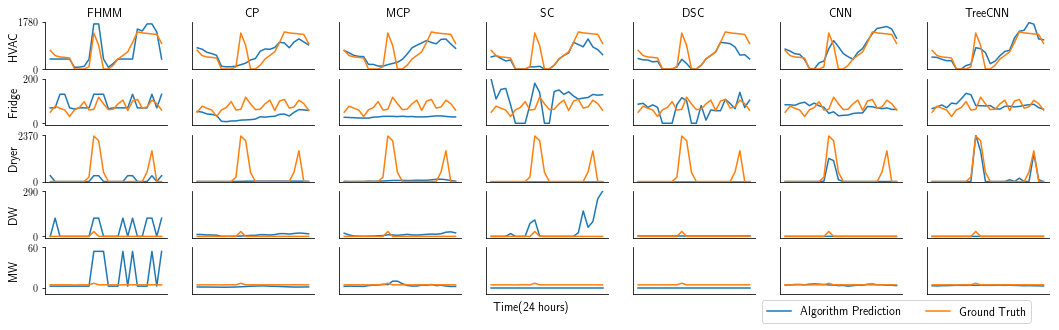

In [10]:
home = 27
day = 1
dataset = 1

i = 0 
home = 3
day = 110

fig, axes = plt.subplots(ncols=7, nrows=5, figsize=(18, 5))
ax = axes.flatten()
i=0
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    for method in ['fhmm', 'stf', 'mtf', 'sc', 'dsc', 'ind cnn', 'tree cnn']:
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[i], yticks=(0, up), ylim=(-10, up))
        ax[i].get_xaxis().set_visible(False)
        ax[i].get_yaxis().set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)


        i += 1
    ax[i-7].get_yaxis().set_visible(True)  
    ax[i-7].set_ylabel(APPLIANCE[idx], fontsize=12)
    ax[i-7].yaxis.set_label_coords(-0.2, 0.5) 
    
ax[0].set_title("FHMM", fontsize=12)
ax[1].set_title("CP", fontsize=12)
ax[2].set_title("MCP", fontsize=12)
ax[3].set_title("SC", fontsize=12)
ax[4].set_title("DSC", fontsize=12)
ax[5].set_title("CNN", fontsize=12)
ax[6].set_title("TreeCNN", fontsize=12)

handles, labels = ax[0].get_legend_handles_labels()
print(handles)
# fig.legend(handles, labels=['Algorithm Prediction', 'Ground Truth'], loc=(0.7, 0.93))
plt.legend(['Algorithm Prediction', 'Ground Truth'], loc='upper right', bbox_to_anchor = (0.9, 0), ncol=2, fontsize=12)
fig.text(0.5,0.08, 'Time(24 hours)', ha='center', fontsize=12)


# plt.tight_layout(h_pad=2.0)
# fig.savefig("./figure/predictions.pdf".format(home, day), format='pdf', bbox_inches='tight')

# plt.cla()

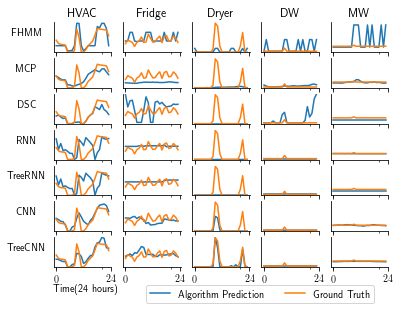

In [11]:
home = 27
day = 1
dataset = 1

i = 0 
home = 3
day = 110

fig, axes = plt.subplots(ncols=5, nrows=7, figsize=(6, 4.5), sharex=True)
ax = axes.flatten()
i=0
for i, method in enumerate(['fhmm', 'mtf', 'sc']):
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#             for method in ['tree cnn']:
#                 print(i, method)
#                 print(pd.DataFrame(max_pred).max()[appliance])
#                 if appliance == 'mw' and method == 'tree cnn':
#                     print(predictions[dataset][method][appliance][home][day])
#                 pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        (pd.Series(predictions[dataset][method][appliance][home][day])).plot(ax=ax[i*5+idx], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[i*5+idx], yticks=(0, up), ylim=(-10, up))
        ax[i*5+idx].spines['right'].set_visible(False)
        ax[i*5+idx].spines['top'].set_visible(False)
#     i += 1
i = 5
for method in ['ind cnn', 'tree cnn']:
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#             for method in ['tree cnn']:
#                 print(i, method)
#                 print(pd.DataFrame(max_pred).max()[appliance])
#                 if appliance == 'mw' and method == 'tree cnn':
#                     print(predictions[dataset][method][appliance][home][day])
#                 pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[i*5+idx], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[i*5+idx], yticks=(0, up), ylim=(-10, up))
        ax[i*5+idx].spines['right'].set_visible(False)
        ax[i*5+idx].spines['top'].set_visible(False)
    i += 1

up = math.ceil(pd.DataFrame(max_pred).max()['hvac']/10.0)*10
pd.Series(rnn_pred['hvac'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[15], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][1][day]).plot(ax=ax[15], yticks=(0, up), ylim=(-10, up))
ax[15].spines['right'].set_visible(False)
ax[15].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['fridge']/10.0)*10
pd.Series(rnn_pred['fridge'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[16], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][2][day]).plot(ax=ax[16], yticks=(0, up), ylim=(-10, up))
ax[16].spines['right'].set_visible(False)
ax[16].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dr']/10.0)*10
pd.Series(rnn_pred['dr'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[17], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][3][day]).plot(ax=ax[17], yticks=(0, up), ylim=(-10, up))
ax[17].spines['right'].set_visible(False)
ax[17].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dw']/10.0)*10
pd.Series(rnn_pred['dw'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[18], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][4][day]).plot(ax=ax[18], yticks=(0, up), ylim=(-10, up))
ax[18].spines['right'].set_visible(False)
ax[18].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['mw']/10.0)*10
pd.Series(rnn_pred['mw'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[19], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][5][day]).plot(ax=ax[19], yticks=(0, up), ylim=(-10, up))
ax[19].spines['right'].set_visible(False)
ax[19].spines['top'].set_visible(False)


# pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
up = math.ceil(pd.DataFrame(max_pred).max()['hvac']/10.0)*10
pd.Series(rnn_tree_pred[1].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[20], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][1][day]).plot(ax=ax[20], yticks=(0, up), ylim=(-10, up))
ax[20].spines['right'].set_visible(False)
ax[20].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['fridge']/10.0)*10
pd.Series(rnn_tree_pred[0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[21], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][2][day]).plot(ax=ax[21], yticks=(0, up), ylim=(-10, up))
ax[21].spines['right'].set_visible(False)
ax[21].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dr']/10.0)*10
pd.Series(rnn_tree_pred[3].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[22], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][3][day]).plot(ax=ax[22], yticks=(0, up), ylim=(-10, up))
ax[22].spines['right'].set_visible(False)
ax[22].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dw']/10.0)*10
pd.Series(rnn_tree_pred[2].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[23], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][4][day]).plot(ax=ax[23], yticks=(0, up), ylim=(-10, up))
ax[23].spines['right'].set_visible(False)
ax[23].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['mw']/10.0)*10
pd.Series(rnn_tree_pred[4].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[24], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][5][day]).plot(ax=ax[24], yticks=(0, up), ylim=(-10, up))
ax[24].spines['right'].set_visible(False)
ax[24].spines['top'].set_visible(False)



# for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#     ax[idx*7].get_yaxis().set_visible(True)  
#     ax[idx*7].set_ylabel(APPLIANCE[idx], fontsize=14)
#     ax[idx*7].yaxis.set_label_coords(-0.2, 0.5) 
    
# ax[0].set_title("FHMM", fontsize=14,)
# # ax[1].set_title("CP", fontsize=14)
# ax[1].set_title("MCP", fontsize=14)
# # ax[2].set_title("SC", fontsize=14)
# ax[2].set_title("DSC", fontsize=14)
# ax[5].set_title("CNN", fontsize=14)
# ax[6].set_title("TreeCNN", fontsize=14)
# ax[3].set_title("RNN", fontsize=14)
# ax[4].set_title("TreeRNN", fontsize=14)
ax[0].set_title("HVAC", fontsize=12)
ax[1].set_title("Fridge", fontsize=12)
ax[2].set_title("Dryer", fontsize=12)
ax[3].set_title("DW", fontsize=12)
ax[4].set_title("MW", fontsize=12)

ax[0].set_ylabel("FHMM", fontsize=10, rotation=0, position=(-0.3,0.5))
ax[5].set_ylabel("MCP", fontsize=10, rotation=0, position=(-0.3,0.5))
ax[10].set_ylabel("DSC", fontsize=10, rotation=0, position=(-0.3,0.5))
ax[15].set_ylabel("RNN", fontsize=10, rotation=0, position=(-0.3,0.5))
ax[20].set_ylabel("TreeRNN", fontsize=10, rotation=0, position=(-0.3,0.5))
ax[25].set_ylabel("CNN", fontsize=10, rotation=0, position=(-0.3,0.5))
ax[30].set_ylabel("TreeCNN", fontsize=10, rotation=0, position=(-10,0.5))

for a in ax:
    a.yaxis.labelpad = 27
    a.set_xticks([0, 24])



for a in ax:
    a.set_yticks([])

# handles, labels = ax[0].get_legend_handles_labels()
# print(handles)
# plt.subplots_adjust(wsp)
# fig.legend(handles, labels=['Algorithm Prediction', 'Ground Truth'], loc=(0.7, 0.93))
plt.legend(['Algorithm Prediction', 'Ground Truth'], loc=(-3.2, -1.2), ncol=2, fontsize=10)
fig.text(0.2, 0.05, 'Time(24 hours)', ha='center', fontsize=10)


# plt.tight_layout(h_pad=2.0)
fig.savefig("./figure/predictions.pdf", format='pdf', bbox_inches='tight')

[<matplotlib.lines.Line2D object at 0x7f10e94fb7b8>, <matplotlib.lines.Line2D object at 0x7f10e94c2080>]


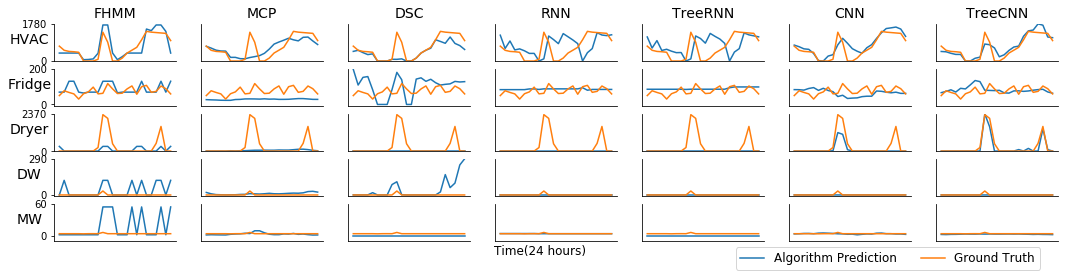

In [25]:
home = 27
day = 1
dataset = 1

i = 0 
home = 3
day = 110

fig, axes = plt.subplots(ncols=7, nrows=5, figsize=(18, 4))
ax = axes.flatten()
i=0
for method in ['fhmm', 'mtf', 'sc']:
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#             for method in ['tree cnn']:
#                 print(i, method)
#                 print(pd.DataFrame(max_pred).max()[appliance])
#                 if appliance == 'mw' and method == 'tree cnn':
#                     print(predictions[dataset][method][appliance][home][day])
#                 pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        ax[idx*7 + i].get_xaxis().set_visible(False)
        ax[idx*7 + i].get_yaxis().set_visible(False)
        ax[idx*7 + i].spines['right'].set_visible(False)
        ax[idx*7 + i].spines['top'].set_visible(False)
    i += 1
i = 5
for method in ['ind cnn', 'tree cnn']:
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#             for method in ['tree cnn']:
#                 print(i, method)
#                 print(pd.DataFrame(max_pred).max()[appliance])
#                 if appliance == 'mw' and method == 'tree cnn':
#                     print(predictions[dataset][method][appliance][home][day])
#                 pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        ax[idx*7 + i].get_xaxis().set_visible(False)
        ax[idx*7 + i].get_yaxis().set_visible(False)
        ax[idx*7 + i].spines['right'].set_visible(False)
        ax[idx*7 + i].spines['top'].set_visible(False)
    i += 1

up = math.ceil(pd.DataFrame(max_pred).max()['hvac']/10.0)*10
pd.Series(rnn_pred['hvac'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[3], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][1][day]).plot(ax=ax[3], yticks=(0, up), ylim=(-10, up))
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['fridge']/10.0)*10
pd.Series(rnn_pred['fridge'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[10], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][2][day]).plot(ax=ax[10], yticks=(0, up), ylim=(-10, up))
ax[10].get_xaxis().set_visible(False)
ax[10].get_yaxis().set_visible(False)
ax[10].spines['right'].set_visible(False)
ax[10].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dr']/10.0)*10
pd.Series(rnn_pred['dr'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[17], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][3][day]).plot(ax=ax[17], yticks=(0, up), ylim=(-10, up))
ax[17].get_xaxis().set_visible(False)
ax[17].get_yaxis().set_visible(False)
ax[17].spines['right'].set_visible(False)
ax[17].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dw']/10.0)*10
pd.Series(rnn_pred['dw'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[24], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][4][day]).plot(ax=ax[24], yticks=(0, up), ylim=(-10, up))
ax[24].get_xaxis().set_visible(False)
ax[24].get_yaxis().set_visible(False)
ax[24].spines['right'].set_visible(False)
ax[24].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['mw']/10.0)*10
pd.Series(rnn_pred['mw'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[31], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][5][day]).plot(ax=ax[31], yticks=(0, up), ylim=(-10, up))
ax[31].get_xaxis().set_visible(False)
ax[31].get_yaxis().set_visible(False)
ax[31].spines['right'].set_visible(False)
ax[31].spines['top'].set_visible(False)


# pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
up = math.ceil(pd.DataFrame(max_pred).max()['hvac']/10.0)*10
pd.Series(rnn_tree_pred[1].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[4], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][1][day]).plot(ax=ax[4], yticks=(0, up), ylim=(-10, up))
ax[4].get_xaxis().set_visible(False)
ax[4].get_yaxis().set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['fridge']/10.0)*10
pd.Series(rnn_tree_pred[0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[11], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][2][day]).plot(ax=ax[11], yticks=(0, up), ylim=(-10, up))
ax[11].get_xaxis().set_visible(False)
ax[11].get_yaxis().set_visible(False)
ax[11].spines['right'].set_visible(False)
ax[11].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dr']/10.0)*10
pd.Series(rnn_tree_pred[3].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[18], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][3][day]).plot(ax=ax[18], yticks=(0, up), ylim=(-10, up))
ax[18].get_xaxis().set_visible(False)
ax[18].get_yaxis().set_visible(False)
ax[18].spines['right'].set_visible(False)
ax[18].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dw']/10.0)*10
pd.Series(rnn_tree_pred[2].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[25], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][4][day]).plot(ax=ax[25], yticks=(0, up), ylim=(-10, up))
ax[25].get_xaxis().set_visible(False)
ax[25].get_yaxis().set_visible(False)
ax[25].spines['right'].set_visible(False)
ax[25].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['mw']/10.0)*10
pd.Series(rnn_tree_pred[4].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[32], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][5][day]).plot(ax=ax[32], yticks=(0, up), ylim=(-10, up))
ax[32].get_xaxis().set_visible(False)
ax[32].get_yaxis().set_visible(False)
ax[32].spines['right'].set_visible(False)
ax[32].spines['top'].set_visible(False)


for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    ax[idx*7].get_yaxis().set_visible(True)  
    ax[idx*7].set_ylabel(APPLIANCE[idx], fontsize=14, rotation=0)
    ax[idx*7].yaxis.set_label_coords(-0.2, 0.4) 
    
ax[0].set_title("FHMM", fontsize=14,)
# ax[1].set_title("CP", fontsize=14)
ax[1].set_title("MCP", fontsize=14)
# ax[2].set_title("SC", fontsize=14)
ax[2].set_title("DSC", fontsize=14)
ax[5].set_title("CNN", fontsize=14)
ax[6].set_title("TreeCNN", fontsize=14)
ax[3].set_title("RNN", fontsize=14)
ax[4].set_title("TreeRNN", fontsize=14)



handles, labels = ax[0].get_legend_handles_labels()
print(handles)
# fig.legend(handles, labels=['Algorithm Prediction', 'Ground Truth'], loc=(0.7, 0.93))
plt.legend(['Algorithm Prediction', 'Ground Truth'], loc='upper right', bbox_to_anchor = (0.9, 0), ncol=2, fontsize=12)
fig.text(0.5,0.08, 'Time(24 hours)', ha='center', fontsize=12)


# plt.tight_layout(h_pad=2.0)
fig.savefig("./figure/predictions.pdf".format(home, day), format='pdf', bbox_inches='tight')

# plt.cla()

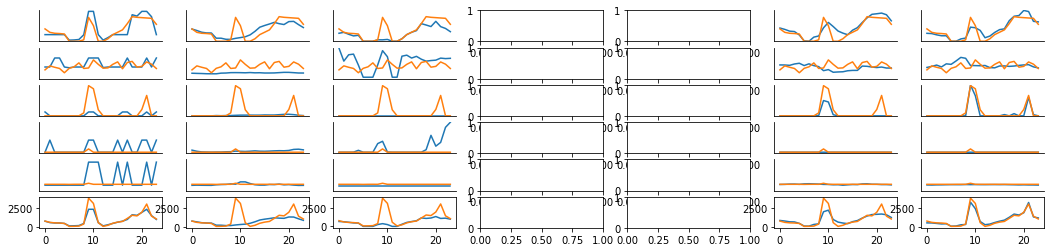

In [36]:
home = 27
day = 1
dataset = 1

i = 0 
home = 3
day = 110

fig, axes = plt.subplots(ncols=7, nrows=6, figsize=(18, 4))
ax = axes.flatten()
i=0
for method in ['fhmm', 'mtf', 'sc']:
    s_pred = 0
    s_true = 0
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        ax[idx*7 + i].get_xaxis().set_visible(False)
        ax[idx*7 + i].get_yaxis().set_visible(False)
        ax[idx*7 + i].spines['right'].set_visible(False)
        ax[idx*7 + i].spines['top'].set_visible(False)
        s_pred += pd.Series(predictions[dataset][method][appliance][home][day])
        s_true += pd.Series(tensor[dataset][home][idx+1][day])
    pd.Series(s_pred).plot(ax=ax[(idx+1)*7 + i])
    pd.Series(s_true).plot(ax=ax[(idx+1)*7 + i])
    i += 1
i = 5
for method in ['ind cnn', 'tree cnn']:
    s_pred = 0
    s_true = 0
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        ax[idx*7 + i].get_xaxis().set_visible(False)
        ax[idx*7 + i].get_yaxis().set_visible(False)
        ax[idx*7 + i].spines['right'].set_visible(False)
        ax[idx*7 + i].spines['top'].set_visible(False)
        s_pred += pd.Series(predictions[dataset][method][appliance][home][day])
        s_true += pd.Series(tensor[dataset][home][idx+1][day])
    pd.Series(s_pred).plot(ax=ax[(idx+1)*7 + i])
    pd.Series(s_true).plot(ax=ax[(idx+1)*7 + i])
    i += 1


[<matplotlib.lines.Line2D object at 0x7f393a5aa320>, <matplotlib.lines.Line2D object at 0x7f394ce82550>]


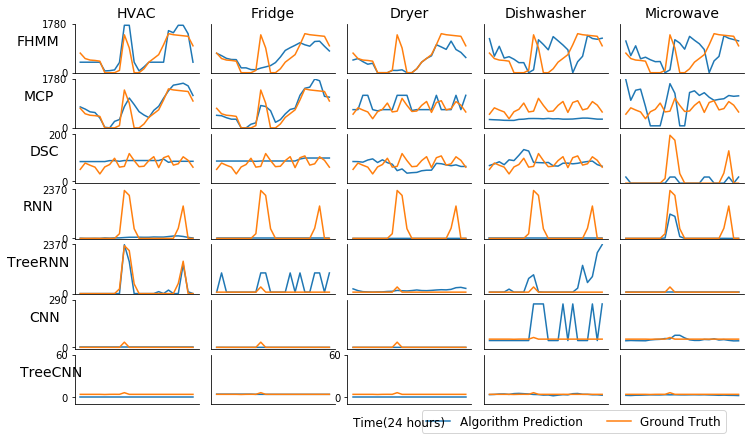

In [36]:
home = 27
day = 1
dataset = 1

i = 0 
home = 3
day = 110

fig, axes = plt.subplots(ncols=5, nrows=7, figsize=(12, 7))
ax = axes.flatten()
i=0
for method in ['fhmm', 'mtf', 'sc']:
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        ax[idx*7 + i].get_xaxis().set_visible(False)
        ax[idx*7 + i].get_yaxis().set_visible(False)
        ax[idx*7 + i].spines['right'].set_visible(False)
        ax[idx*7 + i].spines['top'].set_visible(False)
    i += 1
i = 5
for method in ['ind cnn', 'tree cnn']:
    for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#             for method in ['tree cnn']:
#                 print(i, method)
#                 print(pd.DataFrame(max_pred).max()[appliance])
#                 if appliance == 'mw' and method == 'tree cnn':
#                     print(predictions[dataset][method][appliance][home][day])
#                 pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
        ax[idx*7 + i].get_xaxis().set_visible(False)
        ax[idx*7 + i].get_yaxis().set_visible(False)
        ax[idx*7 + i].spines['right'].set_visible(False)
        ax[idx*7 + i].spines['top'].set_visible(False)
    i += 1

up = math.ceil(pd.DataFrame(max_pred).max()['hvac']/10.0)*10
pd.Series(rnn_pred['hvac'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[3], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][1][day]).plot(ax=ax[3], yticks=(0, up), ylim=(-10, up))
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['fridge']/10.0)*10
pd.Series(rnn_pred['fridge'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[10], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][2][day]).plot(ax=ax[10], yticks=(0, up), ylim=(-10, up))
ax[10].get_xaxis().set_visible(False)
ax[10].get_yaxis().set_visible(False)
ax[10].spines['right'].set_visible(False)
ax[10].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dr']/10.0)*10
pd.Series(rnn_pred['dr'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[17], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][3][day]).plot(ax=ax[17], yticks=(0, up), ylim=(-10, up))
ax[17].get_xaxis().set_visible(False)
ax[17].get_yaxis().set_visible(False)
ax[17].spines['right'].set_visible(False)
ax[17].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dw']/10.0)*10
pd.Series(rnn_pred['dw'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[24], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][4][day]).plot(ax=ax[24], yticks=(0, up), ylim=(-10, up))
ax[24].get_xaxis().set_visible(False)
ax[24].get_yaxis().set_visible(False)
ax[24].spines['right'].set_visible(False)
ax[24].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['mw']/10.0)*10
pd.Series(rnn_pred['mw'][0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[31], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][5][day]).plot(ax=ax[31], yticks=(0, up), ylim=(-10, up))
ax[31].get_xaxis().set_visible(False)
ax[31].get_yaxis().set_visible(False)
ax[31].spines['right'].set_visible(False)
ax[31].spines['top'].set_visible(False)


# pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[idx*7 + i], yticks=(0, up), ylim=(-10, up))
up = math.ceil(pd.DataFrame(max_pred).max()['hvac']/10.0)*10
pd.Series(rnn_tree_pred[1].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[4], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][1][day]).plot(ax=ax[4], yticks=(0, up), ylim=(-10, up))
ax[4].get_xaxis().set_visible(False)
ax[4].get_yaxis().set_visible(False)
ax[4].spines['right'].set_visible(False)
ax[4].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['fridge']/10.0)*10
pd.Series(rnn_tree_pred[0].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[11], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][2][day]).plot(ax=ax[11], yticks=(0, up), ylim=(-10, up))
ax[11].get_xaxis().set_visible(False)
ax[11].get_yaxis().set_visible(False)
ax[11].spines['right'].set_visible(False)
ax[11].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dr']/10.0)*10
pd.Series(rnn_tree_pred[3].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[18], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][3][day]).plot(ax=ax[18], yticks=(0, up), ylim=(-10, up))
ax[18].get_xaxis().set_visible(False)
ax[18].get_yaxis().set_visible(False)
ax[18].spines['right'].set_visible(False)
ax[18].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['dw']/10.0)*10
pd.Series(rnn_tree_pred[2].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[25], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][4][day]).plot(ax=ax[25], yticks=(0, up), ylim=(-10, up))
ax[25].get_xaxis().set_visible(False)
# ax[25].get_yaxis().set_visible(False)
ax[25].spines['right'].set_visible(False)
ax[25].spines['top'].set_visible(False)

up = math.ceil(pd.DataFrame(max_pred).max()['mw']/10.0)*10
pd.Series(rnn_tree_pred[4].reshape(-1, 112, 24)[-1, day]).plot(ax=ax[32], yticks=(0, up), ylim=(-10, up))
pd.Series(tensor[dataset][home][5][day]).plot(ax=ax[32], yticks=(0, up), ylim=(-10, up))
ax[32].get_xaxis().set_visible(False)
# ax[32].get_yaxis().set_visible(False)
ax[32].spines['right'].set_visible(False)
ax[32].spines['top'].set_visible(False)


# for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#     ax[idx*7].get_yaxis().set_visible(True)  
#     ax[idx*7].set_ylabel(APPLIANCE[idx], fontsize=14)
#     ax[idx*7].yaxis.set_label_coords(-0.2, 0.5) 

ax[0].set_title("HVAC", fontsize=14,)
ax[1].set_title("Fridge", fontsize=14)
ax[2].set_title("Dryer", fontsize=14)
ax[3].set_title("Dishwasher", fontsize=14)
ax[4].set_title("Microwave", fontsize=14)
for i in range(0, 31, 5):
    ax[i].get_yaxis().set_visible(True)  
ax[0].set_ylabel("FHMM", fontsize=14, rotation=0)
ax[5].set_ylabel("MCP", fontsize=14, rotation=0)
ax[10].set_ylabel("DSC", fontsize=14, rotation=0)
ax[15].set_ylabel("RNN", fontsize=14, rotation=0)
ax[20].set_ylabel("TreeRNN", fontsize=14, rotation=0)
ax[25].set_ylabel("CNN", fontsize=14, rotation=0)
ax[30].set_ylabel("TreeCNN", fontsize=14, rotation=0)



handles, labels = ax[0].get_legend_handles_labels()
print(handles)
# fig.legend(handles, labels=['Algorithm Prediction', 'Ground Truth'], loc=(0.7, 0.93))
plt.legend(['Algorithm Prediction', 'Ground Truth'], loc='upper right', bbox_to_anchor = (0.9, 0), ncol=2, fontsize=12)
fig.text(0.5,0.08, 'Time(24 hours)', ha='center', fontsize=12)
plt.subplots_adjust(hspace=0.12, wspace=0.1)


# plt.tight_layout(h_pad=2.0)
# fig.savefig("./figure/predictions.pdf".format(home, day), format='pdf', bbox_inches='tight')

# plt.cla()

In [15]:
import matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(names)

['DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono']


In [16]:
max_value = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    print(pd.Series(max_pred[appliance]).max())
    max_pred[appliance] 

1773.98742676
196.5931917
2360.13623047
289.56514378
54.0
